In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Breast_Cancer.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop(columns=['id','Unnamed: 32'])

In [6]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
df.isnull().values.any()

False

In [8]:
df.shape

(569, 31)

In [9]:
df = df.iloc[:-2]

In [10]:
df.shape

(567, 31)

In [11]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = df['diagnosis']

y = y.replace(to_replace = ['B', 'M'], value = [0, 1])

In [12]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [14]:
# standardize the numerical features
standardize = StandardScaler()
standardize.fit(X_train.iloc[:,:30], y_train)

# standardize.transform(...)
X_train.loc[:,:30] = standardize.transform(X_train.iloc[:,:30])
X_test.loc[:,:30] = standardize.transform(X_test.iloc[:,:30])

In [15]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [16]:
y_test.sort_values(inplace=True)
X_test = X_test.reindex(y_test.index)

In [17]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

**Train the classifiers on:**
- X_train 

#### MLPClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression

In [18]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

In [19]:
labels = [x.__class__.__name__ for x in models]

In [20]:
model_predictions = []

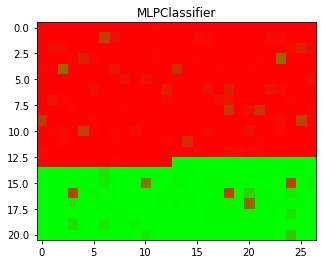

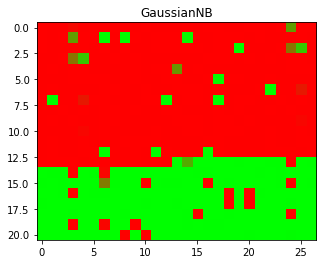

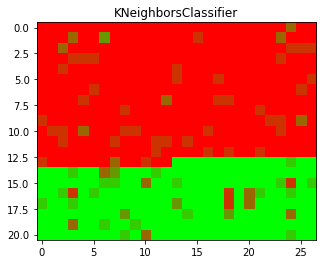

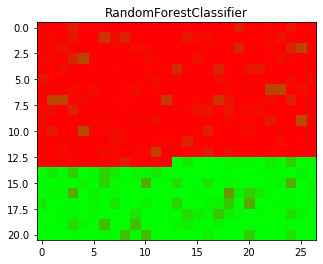

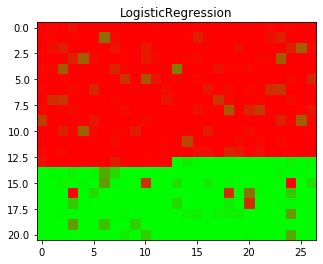

In [21]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    for i in range(21):
        row = []
        for j in range(27):
            row.append(blended[i*21+j])
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [22]:
matrix = np.zeros((len(models), len(models)))

In [23]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### MLPClassifier

In [24]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_model_y_test_predictions = nn_model.predict(X_test)

**Train the other classifiers on:**
- X_train + more labeled points given by the "reference” model

In [25]:
X_train = np.concatenate((X_train, X_test), axis=0)

In [26]:
y_train = np.concatenate((y_train.to_numpy(), nn_model_y_test_predictions), axis=0)

In [27]:
X_train.shape

(567, 30)

In [28]:
model_predictions = []

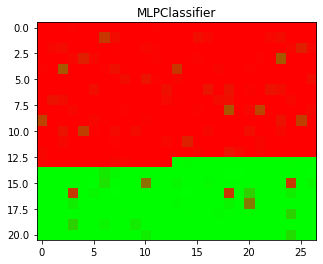

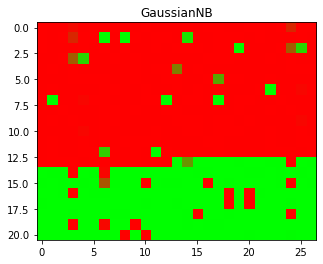

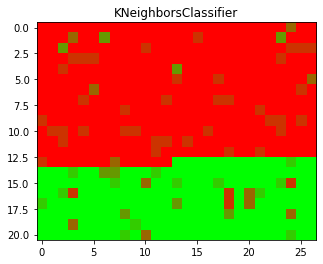

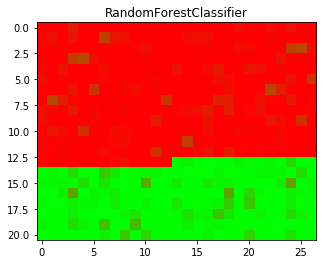

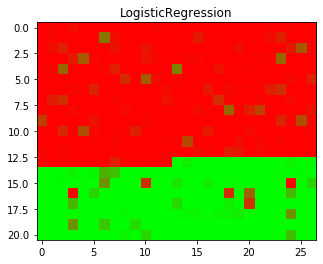

In [29]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    for i in range(21):
        row = []
        for j in range(27):
            row.append(blended[i*21+j])
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [30]:
matrix2 = np.zeros((len(models), len(models)))

In [31]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix2[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### Comparison

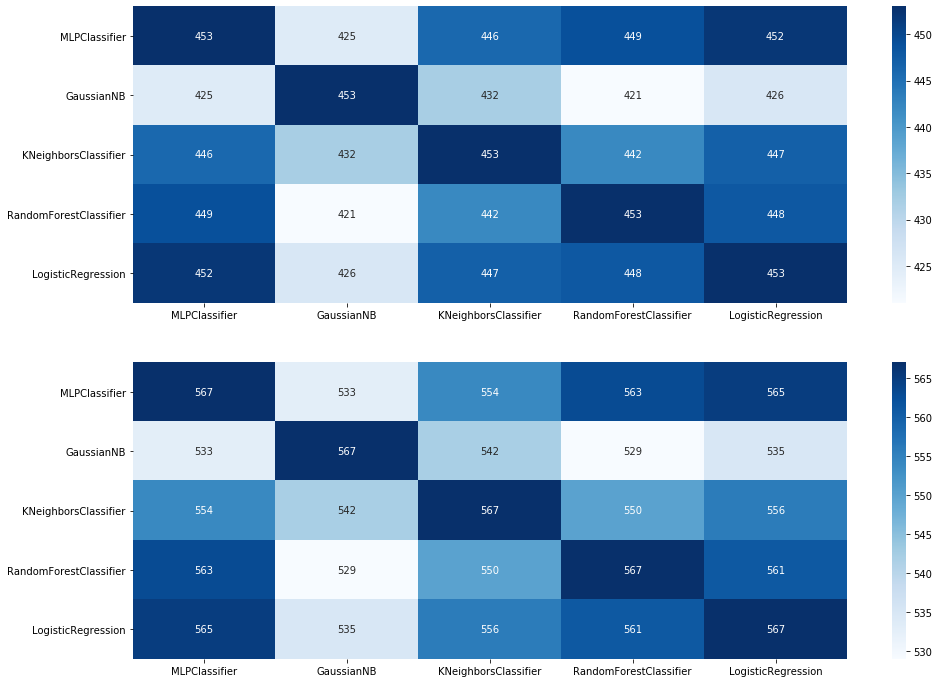

In [32]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

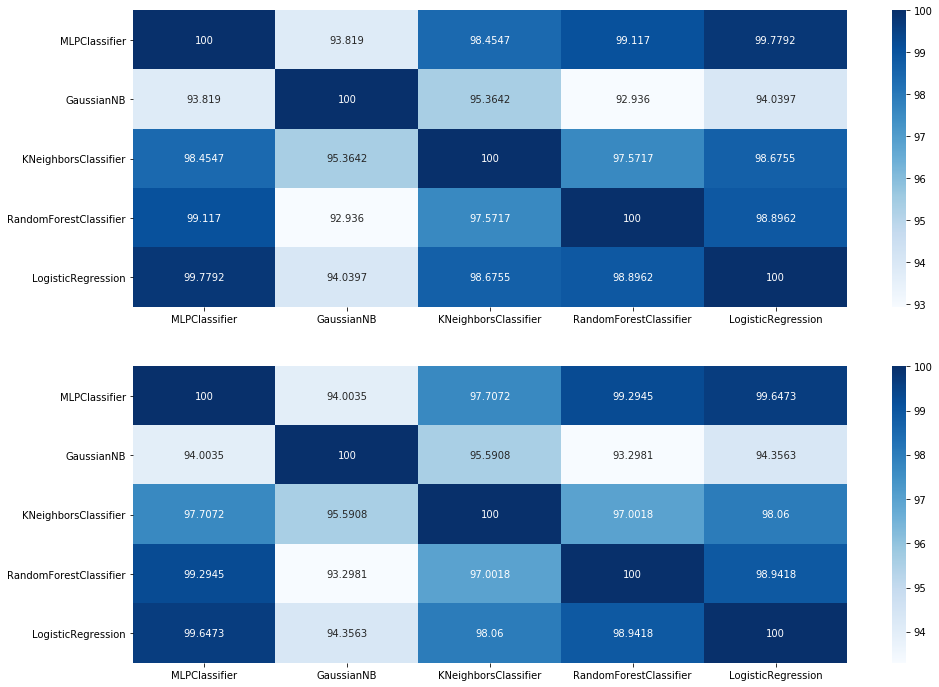

In [33]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2 / matrix2.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

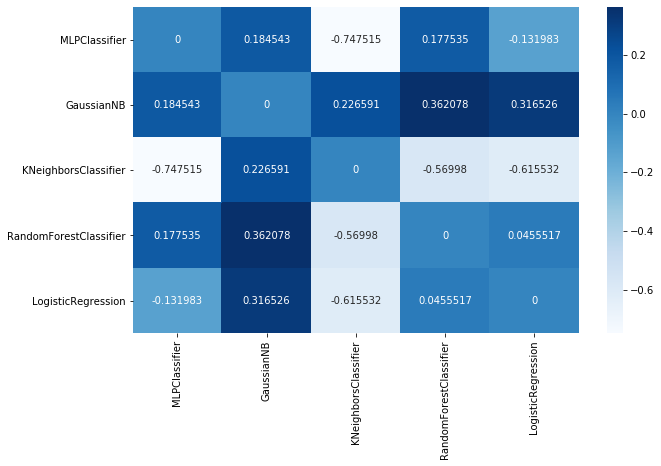

In [34]:
plt.figure(figsize=(10, 6))
seaborn.heatmap(matrix2 / matrix2.max() * 100 - matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')